In [1]:
import tensorflow as tf
import pandas as pd
from matplotlib import pyplot as plt

image_size = 299

In [3]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(image_size,image_size,3,)))
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides = (1,1), activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2)))
model.add(tf.keras.layers.GlobalMaxPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(2, activation='sigmoid')) # = 2 predicted classes

In [12]:
def define_generators():
    train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rotation_range=360,
        width_shift_range=0.3,
        height_shift_range=0.3,
        shear_range=0.3,
        zoom_range=0.5,
        vertical_flip=True,
        horizontal_flip=True,
        validation_split=0.1, # change to use validation instead of training on entire training set
    )

    train_generator = train_datagen.flow_from_directory(
        directory='plant-seedlings-classification/train',
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='training',
    )

    validation_generator = train_datagen.flow_from_directory(
        directory='plant-seedlings-classification/train',
        target_size=(width, height),
        batch_size=batch_size,
        color_mode='rgb',
        class_mode="categorical",
        subset='validation',
    )

    test_datagen = tf.keras.preprocessing.image.ImageDataGenerator()

    test_generator = test_datagen.flow_from_directory(
        directory='plant-seedlings-classification/',
        classes=['test'],
        target_size=(width, height),
        batch_size=1,
        color_mode='rgb',
        shuffle=False,
        class_mode='categorical')

    return train_generator, validation_generator, test_generator

In [13]:
def define_callbacks():
    save_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_acc',
        save_best_only=True,
        verbose=1
    )

    return save_callback

In [14]:
nb_epoch     = 5
batch_size   = 16
width        = image_size
height       = image_size
species_list = ["Non-Plant", "Plant"]

In [ ]:
train_generator, validation_generator, test_generator = define_generators()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint = tf.keras.callbacks.ModelCheckpoint('plant_classifier.h5',
                                                    save_best_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose = 1)
history = model.fit(train_generator,
          epochs=5,
          steps_per_epoch= 3803//batch_size,
          validation_data=validation_generator,
          validation_steps = 947//batch_size,
          callbacks = [checkpoint],
          verbose = 1
)

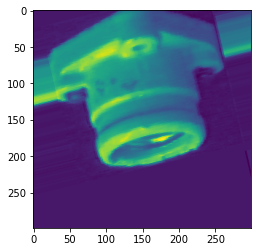

In [16]:
plt.imshow(train_generator[111][0][11][:,:,2])

In [17]:
predictions = model.predict(test_generator, steps=test_generator.samples)

class_list = []

for i in range(0, predictions.shape[0]):
    y_class = predictions[i, :].argmax(axis=-1)
    class_list += [species_list[y_class]]

In [ ]:
class_list

In [78]:
m = tf.keras.models.load_model('TreeVerse_Model.h5')

In [19]:
import cv2
import numpy as np

image_size = 299

In [96]:
def pred_process(path):
    img = cv2.imread(path)
    img = cv2.resize(img, (image_size, image_size))  
#     plt.imshow(img)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    img=np.array(img)
    img =img.reshape(1,image_size,image_size,3)
    return img

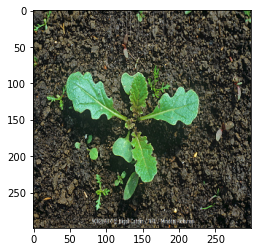

In [467]:
path = "./0.jpg"
img = pred_process(path)

In [468]:
pr = m.predict(img)
pr

array([[9.9995047e-01, 5.1817298e-04]], dtype=float32)

In [469]:
np.array(test_generator[0][0]).shape

(1, 299, 299, 3)

In [470]:
species_list[pr.argmax()]

if(pr[0][1] > 0.1):
    y_class=1
else:
    y_class=0
    

In [471]:
# y_class = pr[0, :].argmax(axis=-1)
class_list += [species_list[y_class]]

species_list[y_class]

'Non-Plant'

In [472]:
y_class

0

In [474]:
pr.squeeze()

array([9.9995047e-01, 5.1817298e-04], dtype=float32)

In [ ]:
# class_list

In [ ]:
# 0 - Non_plant
# 1- Plant

In [212]:
mw = m.get_weights()

In [ ]:
mw[-2]